In [21]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import subprocess as sp
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator

In [22]:
%matplotlib inline

In [23]:
shapes = ['circles','squares','triangles']
files = []
result = []
for shape in shapes:
    path = os.getcwd()+"/shapes/"+shape+"/"
    for file in os.listdir(path):
        files.append(os.path.join(path,file))
        result.append(shape)

In [24]:
print(len(files))
result = np.asarray(result).reshape((300,1))
encoder = LabelBinarizer()
result = encoder.fit_transform(result)
print(result)

300
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 

In [25]:
images = []
for file in files:
    img = mpimg.imread(file)
    images.append(img)

In [26]:
data = np.asarray(images)
data.shape

(300, 28, 28, 3)

In [27]:
num_classes = 3
epochs = 75
datagen = ImageDataGenerator(
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=.1,
    horizontal_flip=True,
    vertical_flip=True)
img_rows = data.shape[1]
img_cols = data.shape[2]

In [8]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
             metrics=['accuracy'])


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        592       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

In [10]:
Xc_train = data[:80]
Xs_train = data[100:180]
Xt_train = data[200:280]
Xc_cv = data[80:90]
Xs_cv = data[180:190]
Xt_cv = data[280:290]
Xc_test = data[90:100]
Xs_test = data[190:200]
Xt_test = data[290:]

In [11]:
Yc_train = result[:80]
Ys_train = result[100:180]
Yt_train = result[200:280]
Yc_cv = result[80:90]
Ys_cv = result[180:190]
Yt_cv = result[280:290]
Yc_test = result[90:100]
Ys_test = result[190:200]
Yt_test = result[290:]

In [12]:
X_train = np.concatenate((Xc_train,Xs_train,Xt_train),axis=0)
Y_train = np.concatenate((Yc_train,Ys_train,Yt_train),axis=0)
X_cv = np.concatenate((Xc_cv,Xs_cv,Xt_cv),axis=0)
Y_cv = np.concatenate((Yc_cv,Ys_cv,Yt_cv),axis=0)
X_test = np.concatenate((Xc_test,Xs_test,Xt_test),axis=0)
Y_test= np.concatenate((Yc_test,Ys_test,Yt_test),axis=0)

In [13]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_cv.shape)
print(Y_test.shape)

(240, 28, 28, 3)
(30, 28, 28, 3)
(30, 28, 28, 3)
(240, 3)
(30, 3)
(30, 3)


In [14]:
history = model.fit(X_train, Y_train,
                    batch_size=1,
          epochs=epochs,
          verbose=1,
          validation_data=(X_cv, Y_cv))

Train on 240 samples, validate on 30 samples
Epoch 1/75
240/240 [==============================] - 2s 9ms/step - loss: 0.2618 - acc: 0.3250 - val_loss: 0.2217 - val_acc: 0.3333
Epoch 2/75
240/240 [==============================] - 1s 4ms/step - loss: 0.2242 - acc: 0.2875 - val_loss: 0.2222 - val_acc: 0.3333
Epoch 3/75
240/240 [==============================] - 1s 3ms/step - loss: 0.2227 - acc: 0.3292 - val_loss: 0.2222 - val_acc: 0.3333
Epoch 4/75
240/240 [==============================] - 1s 3ms/step - loss: 0.2229 - acc: 0.3250 - val_loss: 0.2222 - val_acc: 0.3333
Epoch 5/75
240/240 [==============================] - 1s 3ms/step - loss: 0.2224 - acc: 0.3125 - val_loss: 0.2222 - val_acc: 0.3333
Epoch 6/75
240/240 [==============================] - 1s 3ms/step - loss: 0.2216 - acc: 0.3125 - val_loss: 0.2216 - val_acc: 0.3333
Epoch 7/75
240/240 [==============================] - 1s 3ms/step - loss: 0.2257 - acc: 0.3625 - val_loss: 0.2212 - val_acc: 0.3333
Epoch 8/75
240/240 [===========

240/240 [==============================] - 1s 3ms/step - loss: 0.0368 - acc: 0.9208 - val_loss: 0.0674 - val_acc: 0.8333
Epoch 63/75
240/240 [==============================] - 1s 3ms/step - loss: 0.0452 - acc: 0.9042 - val_loss: 0.0562 - val_acc: 0.9000
Epoch 64/75
240/240 [==============================] - 1s 3ms/step - loss: 0.0535 - acc: 0.8833 - val_loss: 0.0662 - val_acc: 0.8667
Epoch 65/75
240/240 [==============================] - 1s 3ms/step - loss: 0.0505 - acc: 0.8958 - val_loss: 0.0752 - val_acc: 0.8000
Epoch 66/75
240/240 [==============================] - 1s 3ms/step - loss: 0.0369 - acc: 0.9083 - val_loss: 0.0803 - val_acc: 0.8333
Epoch 67/75
240/240 [==============================] - 1s 3ms/step - loss: 0.0436 - acc: 0.8917 - val_loss: 0.0629 - val_acc: 0.8000
Epoch 68/75
240/240 [==============================] - 1s 3ms/step - loss: 0.0558 - acc: 0.8667 - val_loss: 0.0922 - val_acc: 0.8000
Epoch 69/75
240/240 [==============================] - 1s 3ms/step - loss: 0.0525

Text(0.5,1,'Accuracy Curves')

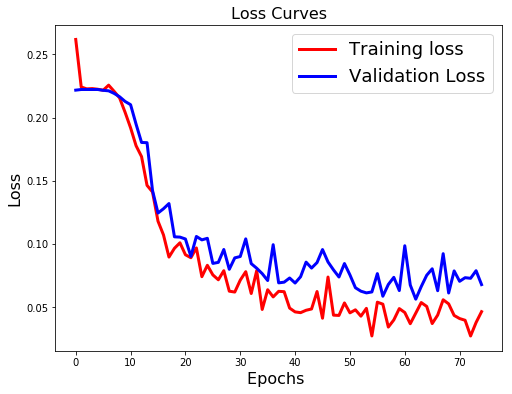

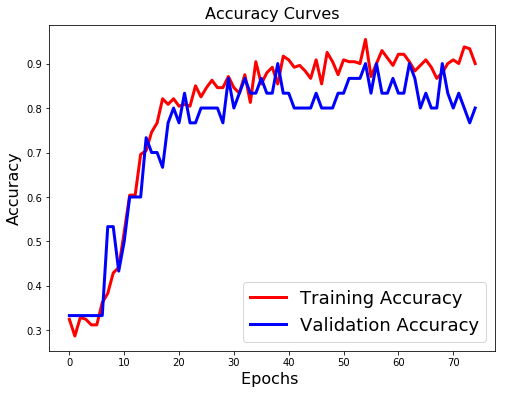

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [16]:
predict = model.predict(X_test)

In [17]:
loss, accu = model.evaluate(X_test,Y_test,verbose=1)

30/30 [==============================] - 0s 56us/step


In [18]:
print(accu)

0.9333333373069763
